# MNIST NN digits classifier in TensorFlow

### get the data from TF tutorials mnist

In [7]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

# as a one-hot encoder vector
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Tensorflow place holder, variables and core functions for a simple model

In [3]:
# one-hot encoder entry data
x = tf.placeholder("float", [None, 784])
# Weights tensor entry_size * output_size
W = tf.Variable(tf.zeros([784, 10]))
# Bias tensor * output_size
b = tf.Variable(tf.zeros([10]))

# Probability distribution with Softmax function over logits
y = tf.nn.softmax(tf.matmul(x, W) + b)
# Outputs labels
y_ = tf.placeholder("float", [None, 10])
# Cross entropy to measure performance
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

# Gradiant descent Optimizer
epsilon = 0.01  # learning rate
train_step = tf.train.GradientDescentOptimizer(epsilon).minimize(cross_entropy)


## TensorFlow session

### Training iteration proccess and accuracy computation

In [10]:
epochs = 1000 # numer of iteratons
batch_size = 100

# start Tensorflow session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

acc = []
for i in range(epochs):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)  # not optimal, repeating cases?!!?
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    # compare predicted y with real labes get boolean values
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    # convert boolean values to reals and get the mean
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    a = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    acc.append(a)
    if i % 10 == 0:
        print(i, ' Training accuracy: %.2f%%' % (a * 100))


0  Training accuracy: 40.75%
10  Training accuracy: 82.45%
20  Training accuracy: 69.86%
30  Training accuracy: 84.02%
40  Training accuracy: 86.56%
50  Training accuracy: 85.45%
60  Training accuracy: 87.95%
70  Training accuracy: 84.94%
80  Training accuracy: 86.24%
90  Training accuracy: 80.47%
100  Training accuracy: 89.40%
110  Training accuracy: 89.42%
120  Training accuracy: 89.61%
130  Training accuracy: 89.68%
140  Training accuracy: 90.22%
150  Training accuracy: 90.15%
160  Training accuracy: 88.17%
170  Training accuracy: 90.12%
180  Training accuracy: 88.88%
190  Training accuracy: 89.99%
200  Training accuracy: 89.89%
210  Training accuracy: 90.37%
220  Training accuracy: 89.41%
230  Training accuracy: 90.61%
240  Training accuracy: 90.45%
250  Training accuracy: 88.78%
260  Training accuracy: 90.79%
270  Training accuracy: 90.64%
280  Training accuracy: 88.86%
290  Training accuracy: 90.96%
300  Training accuracy: 90.12%
310  Training accuracy: 90.26%
320  Training accur

### Plot accuracy

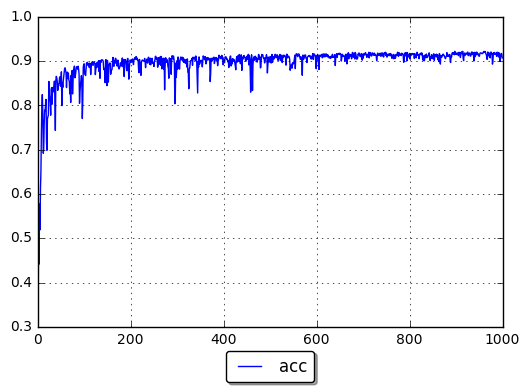

In [11]:
plt.plot(acc, linewidth=1, label="acc")
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()